In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings


In [12]:
iris=load_iris()
#display(iris)
#iris.data:鸢尾花数据集
#iris.target:每朵鸢尾花对应的类别。（取值为0，1，2）
print(iris.data[:10],iris.target[:10])
#iris.feature_names:特征列的名称。
#iris.target_name:鸢尾花类别的名称。
print(iris.feature_names,iris.target_names)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [0 0 0 0 0 0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [14]:
sns.set(style='darkgrid')
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False
#忽视警告信息
warnings.filterwarnings("ignore")


In [15]:
#将鸢尾花数据与对应的类型合并，组合成完整的记录。
data=np.concatenate([iris.data,iris.target.reshape(-1,1)],axis=1)
print(type(data))
print(data[:10])
print(data.dtype)
data=pd.DataFrame(data,
columns=["sepal_length","sepal_width","petal_length","petal_width","type"])
print(type(data))
data.sample(10)
print(data.head())
data.info()

<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]]
float64
<class 'pandas.core.frame.DataFrame'>
   sepal_length  sepal_width  petal_length  petal_width  type
0           5.1          3.5           1.4          0.2   0.0
1           4.9          3.0           1.4          0.2   0.0
2           4.7          3.2           1.3          0.2   0.0
3           4.6          3.1           1.5          0.2   0.0
4           5.0          3.6           1.4          0.2   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   pet

0.0    50
2.0    50
1.0    50
Name: type, dtype: int64
<class 'pandas.core.series.Series'>
0.0    33.333333
2.0    33.333333
1.0    33.333333
Name: type, dtype: float64


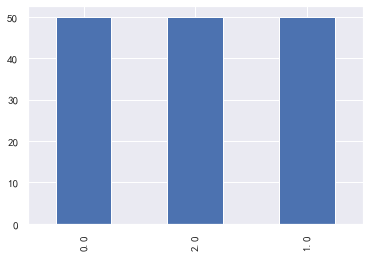

In [18]:
#分析
#计算鸢尾花数据中，每个类别出现的频数
frequency=data["type"].value_counts()
print(frequency)
print(type(frequency))
#计算每个类别出现的频率
percentage=frequency*100/len(data)
print(percentage)
plt.savefig('./countclass.jpg')
frequency.plot(kind="bar")
plt.savefig('./countclass.jpg')

In [21]:
#计算花萼长度的均值
mean=data["sepal_length"].mean()
#计算花萼长度的中位数
median=data["sepal_length"].median()
#计算花萼长度的众数
s=data["sepal_length"].mode()
#注意，model方法返回的是series类型
mode=s.iloc[0]
print(mean,median,mode)


5.843333333333335 5.8 5.0


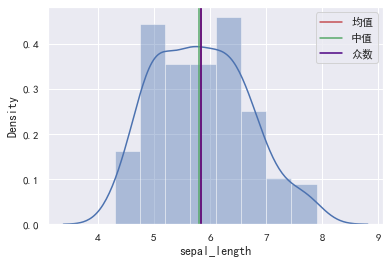

In [37]:
from scipy import stats
stats.mode(data["sepal_length"]).mode

#绘制数据的分布（直方图+密度图）

sns.distplot(data["sepal_length"])
plt.axvline(mean,color="r",label="均值")
plt.axvline(median,color="g",label="中值")
plt.axvline(mean,color="indigo",label="众数")
plt.legend()
plt.savefig('./distribution.jpg')
x=np.arange(10,19)
n=len(x)

2.25 4.5 6.75
[12 14 16]
2.25 4.5 6.75
[12.25 14.5  16.75]


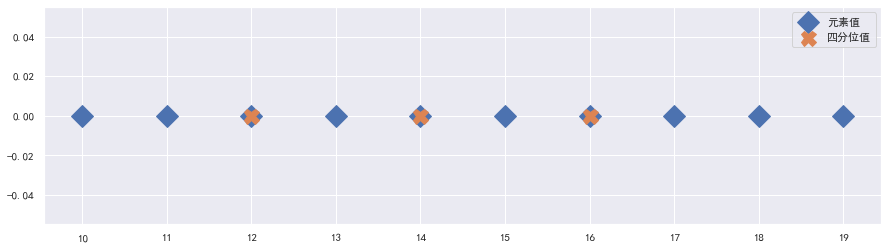

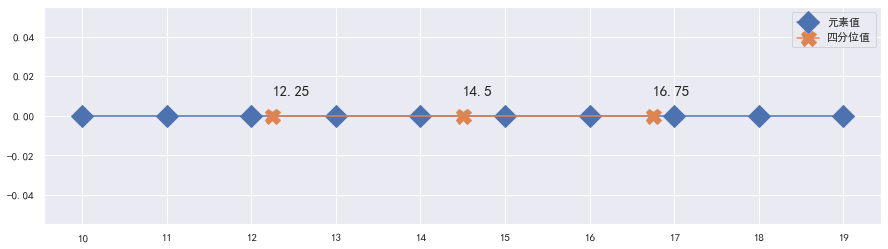

In [39]:
#计算四分位的索引（index）
q1_index=(n-1)*0.25
q2_index=(n-1)*0.5
q3_index=(n-1)*0.75
print(q1_index,q2_index,q3_index)

#将index转化成整数类型
index=np.array([q1_index,q2_index,q3_index]).astype(np.int32)
print(x[index])

plt.figure(figsize=(15,4))
plt.xticks(x)
plt.plot(x,np.zeros(len(x)),ls="",marker="D",ms=15,label="元素值")
plt.plot(x[index],np.zeros(len(index)),ls="",marker="X",ms=15,label="四分位值")
plt.legend()

x=np.arange(10,20)
n=len(x)
q1_index=(n-1)*0.25
q2_index=(n-1)*0.5
q3_index=(n-1)*0.75
print(q1_index,q2_index,q3_index)

index=np.array([q1_index,q2_index,q3_index])
#计算左边元素的值
left=np.floor(index).astype(np.int32)
#计算右边元素的值
right=np.ceil(index).astype(np.int32)
#获取index的小数部分与整数部分
weight,_=np.modf(index)
#根据左右两边的整数，加权计算四分位数的值，权重与距离成反比
q=x[left] * (1-weight) + x[right] * weight
print(q)

plt.figure(figsize=(15,4))
plt.xticks(x)
plt.plot(x,np.zeros(len(x)),marker="D",ms=15,label="元素值")
plt.plot(q,np.zeros(len(index)),marker="X",ms=15,label="四分位值")
for v in q:
    plt.text(v,0.01,s=v,fontsize=15)
    plt.legend()
plt.savefig('./valandfour.jpg')

3.6000000000000005 0.6856935123042505 0.8280661279778629


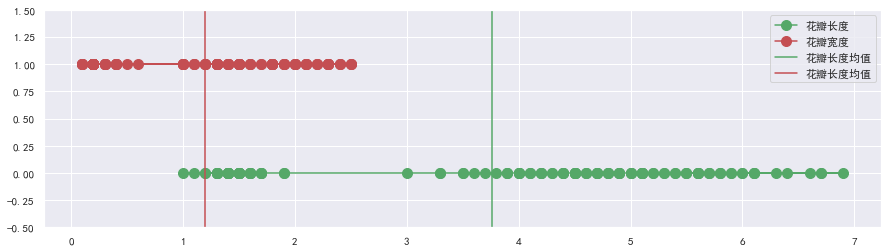

In [42]:
# #numpy
# x = [1, 3, 10, 15, 18, 20, 23, 25]
# #quantile与percentile都可以就算分位数，不同的是，quantile方法
# #q（要计算的分位数）的取值范围为【0，1】，而percentile方法，q的
# #取值范围为【0，100】
# print(np.quantile(x,q=[0.25,0.5,0.75]))
# print(np.percentile(x,q=[25,50,75]))
#
# #pandas
# x = [1, 3, 10, 15, 18, 20, 23, 25]
# s=pd.Series(x)
# print(s.describe())
#
# s.describe(percentiles=[0.25,0.9])

#计算极差
sub=data["sepal_length"].max()-data["sepal_length"].min()
#计算方差
var=data["sepal_length"].var()
#计算标准差
std=data["sepal_length"].std()
print(sub, var, std)

plt.figure(figsize=(15,4))
plt.ylim(-0.5,1.5)
#print(data["petal_width"])
plt.plot(data["petal_length"], np.zeros(len(data)), marker="o",ms=10,color="g",label="花瓣长度")
plt.plot(data["petal_width"], np.ones(len(data)), marker="o",ms=10,color="r",label="花瓣宽度")
plt.axvline(data["petal_length"].mean(),color="g",label="花瓣长度均值")
plt.axvline(data["petal_width"].mean(),color="r",label="花瓣长度均值")
plt.legend()
plt.savefig("./lwandavg")

-0.9138835971908307 0.9567878196250934


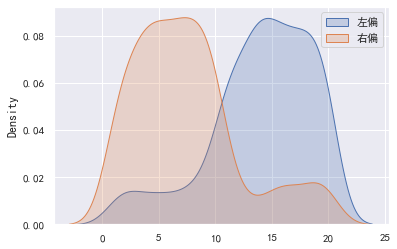

In [43]:
#构造左偏分布数据
t1=np.random.randint(1,11,size=100)
t2=np.random.randint(11,21,size=500)
t3=np.concatenate([t1,t2])
left_skew=pd.Series(t3)
#构造右偏分布数据
t1=np.random.randint(1,11,size=500)
t2=np.random.randint(11,21,size=100)
t3=np.concatenate([t1,t2])
right_skew=pd.Series(t3)
#计算偏度
print(left_skew.skew(),right_skew.skew())
#绘制核密度图 =概率密度图
sns.kdeplot(left_skew,shade=True,label="左偏")
sns.kdeplot(right_skew,shade=True,label="右偏")
plt.legend()
plt.savefig('./k.jpg')

标准正态分布峰度： 0.01194082373985772 标准差: 1.0024472416065398
花萼宽度峰度： 0.2282490424681929 标准差: 0.435866284936698
花瓣长度峰度： -1.4021034155217518 标准差: 1.7652982332594667


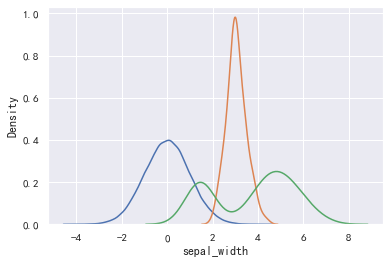

In [44]:
#标准正态分布
standard_normal=pd.Series(np.random.normal(0,1,size=100000))
print("标准正态分布峰度：",standard_normal.kurt(), "标准差:",standard_normal.std())
print("花萼宽度峰度：",data["sepal_width"].kurt(),"标准差:",data["sepal_width"].std())
print("花瓣长度峰度：",data["petal_length"].kurt(),"标准差:",data["petal_length"].std())
sns.kdeplot(standard_normal,label="标准正态分布")
sns.kdeplot(data["sepal_width"],label="花萼宽度")
sns.kdeplot(data["petal_length"],label="花瓣长度")
plt.savefig("./bzzt.jpg")